In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Nashville_housing_data_2013_2016.csv')

In [3]:
# test for duplicates
print(df.duplicated().value_counts())

False    56636
Name: count, dtype: int64


In [4]:
# detect missing values
# total values in each column
df.isnull().sum()

Unnamed: 0.1                             0
Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

In [5]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date',
       'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City',
       'State', 'Acreage', 'Tax District', 'Neighborhood', 'image',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath'],
      dtype='object')


In [6]:
# drop: image, Unnamed: 0.1 from df also drop repeated information of Address, City, State (they are all in TN) the Property Address and Property City are missing less values 
df.drop(['image', 'Unnamed: 0.1', 'Address', 'City', 'State'], axis=1, inplace=True)

In [7]:
print(df.columns)

Index(['Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
       'Suite/ Condo   #', 'Property City', 'Sale Date', 'Sale Price',
       'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Acreage',
       'Tax District', 'Neighborhood', 'Land Value', 'Building Value',
       'Total Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath'],
      dtype='object')


In [8]:
df.isnull().sum()

# makes sense for there to be missing Suite/ Condo   # so keeping in dataset
# property city/property address missing - most of it is vacant land, but not all
# most of the Owner Name:Half Bath are essentially missing the same type of data so going to make subset based off those variables -- to be explored further either Python or Power BI


Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade                                32471
Bedrooms   

In [10]:
# Subset of rows with null values in specified columns
null_subset_df = df[df[['Property Address', 'Property City', 'Owner Name', 'Acreage', 'Tax District', 'Neighborhood', 
                        'Land Value', 'Building Value', 'Total Value', 'Finished Area', 
                        'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 
                        'Bedrooms', 'Full Bath', 'Half Bath']].isnull().any(axis=1)]

# Subset of rows without null values in specified columns
non_null_subset_df = df[~df[['Property Address', 'Property City', 'Owner Name', 'Acreage', 'Tax District', 'Neighborhood', 
                              'Land Value', 'Building Value', 'Total Value', 'Finished Area', 
                              'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 
                              'Bedrooms', 'Full Bath', 'Half Bath']].isnull().any(axis=1)]

In [11]:
null_subset_df.isnull().sum()


Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     26808
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade                                32471
Bedrooms   

In [ ]:
null_subset_df.shape

(32915, 29)

In [ ]:
non_null_subset_df.isnull().sum()

Unnamed: 0.1                         0
Unnamed: 0                           0
Parcel ID                            0
Land Use                             0
Property Address                     0
Property City                        0
Sale Date                            0
Sale Price                           0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Owner Name                           0
Address                              0
City                                 0
State                                0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                    

In [ ]:
non_null_subset_df.shape

(23721, 29)

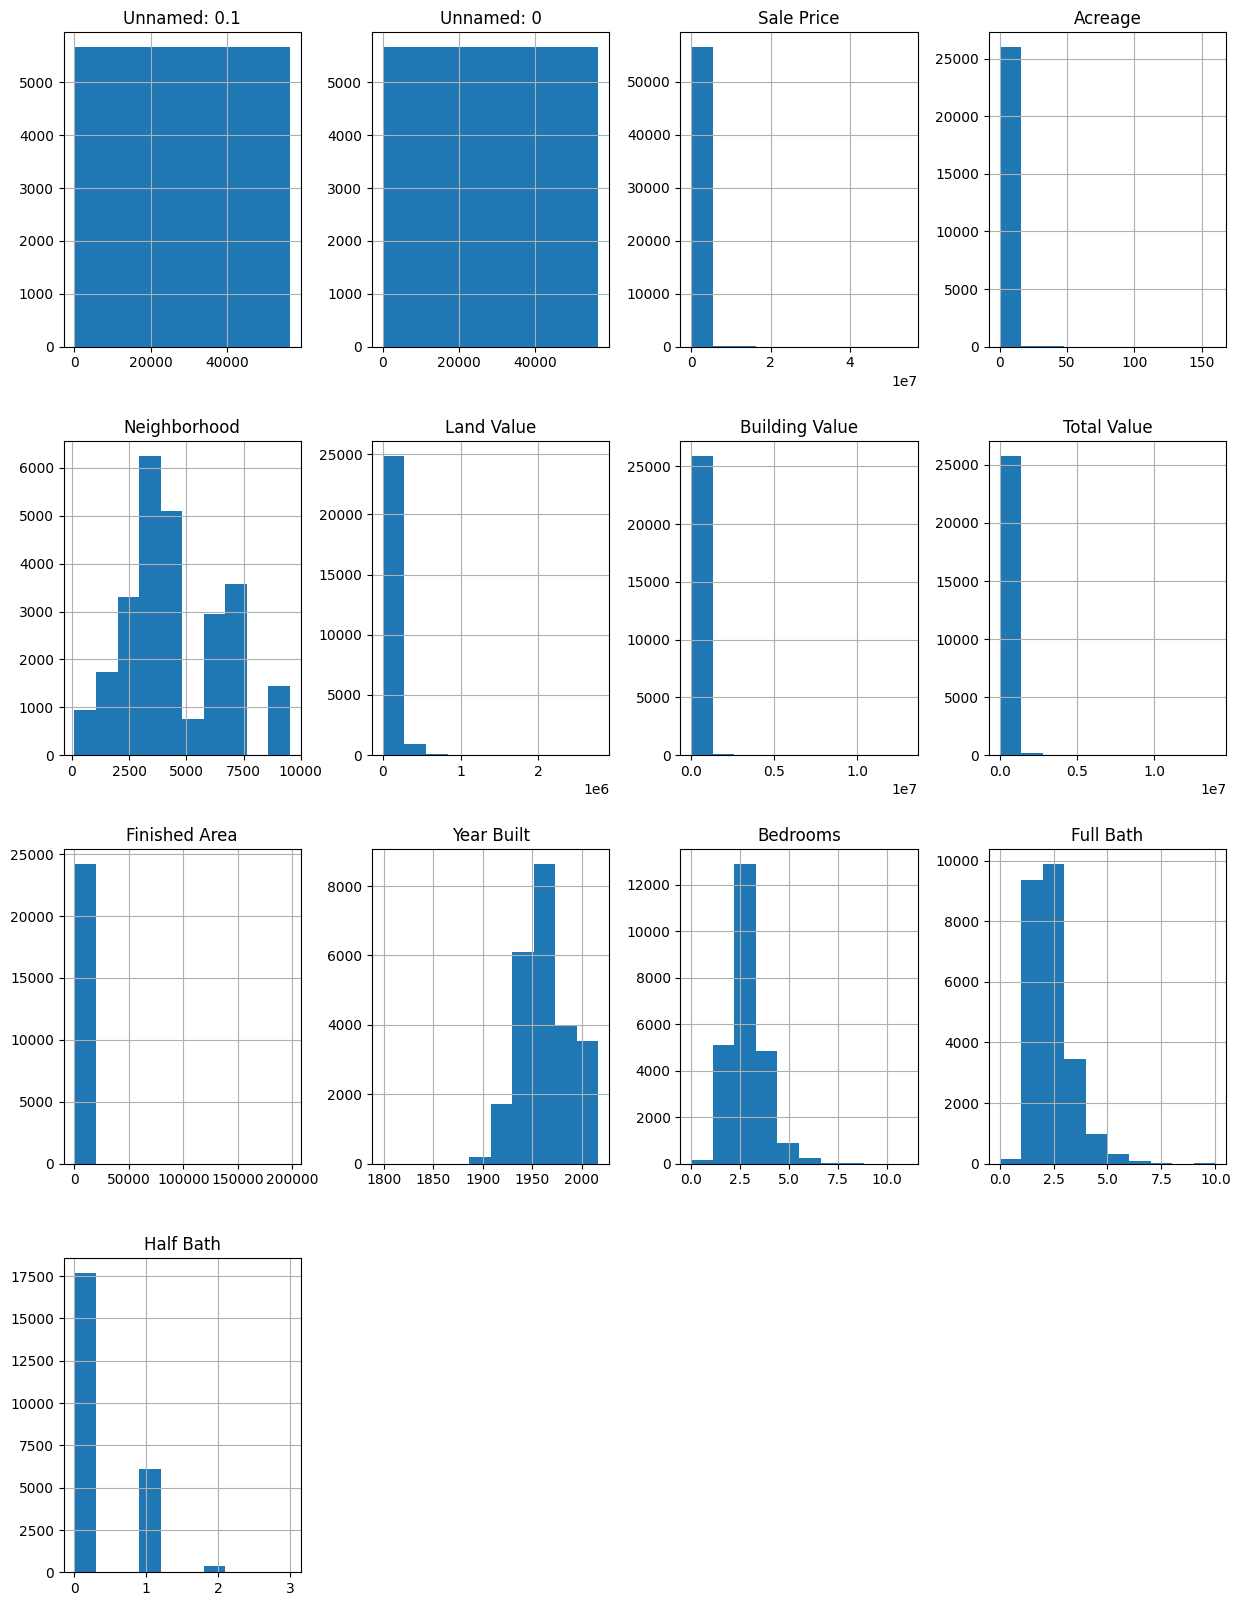

In [ ]:
# visualizing data by histograms
df.hist(figsize=(15,20))
plt.show()

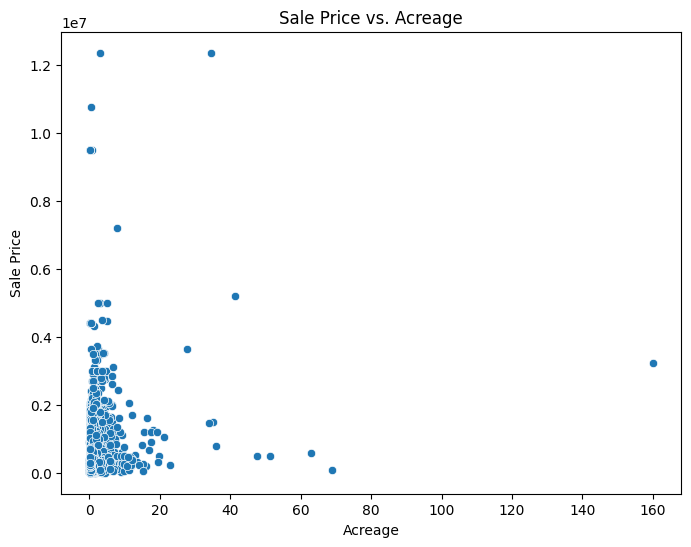

In [ ]:
# Scatter plot for Sale Price vs. Acreage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Acreage', y='Sale Price', data=df)
plt.title('Sale Price vs. Acreage')
plt.xlabel('Acreage')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
# Get the top 10 land use categories
top_land_use = df['Land Use'].value_counts().nlargest(10)

# Print the top 10 land use categories
print("Top 10 Land Use Categories:")
print(top_land_use)


Top 10 Land Use Categories:
Land Use
SINGLE FAMILY              34268
RESIDENTIAL CONDO          14081
VACANT RESIDENTIAL LAND     3586
VACANT RES LAND             1575
DUPLEX                      1389
ZERO LOT LINE               1049
CONDO                        252
RESIDENTIAL COMBO/MISC        95
TRIPLEX                       92
QUADPLEX                      39
Name: count, dtype: int64


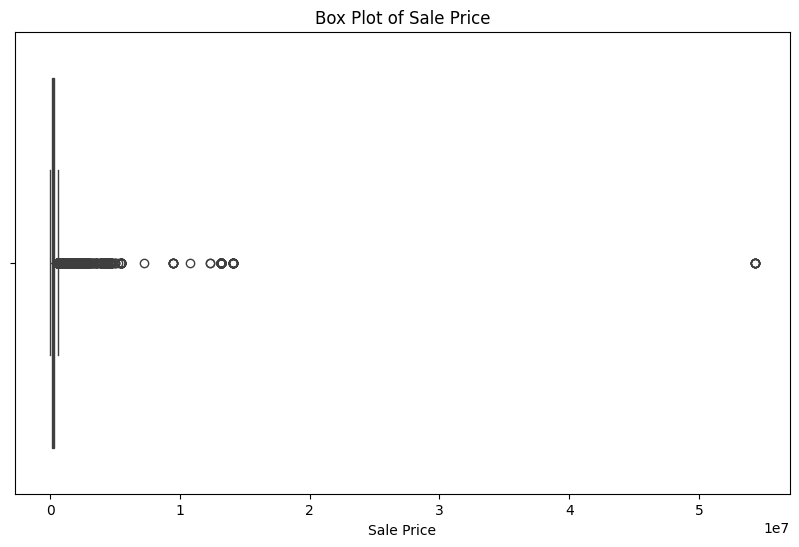

In [ ]:
# THIS OUTLIER SHOULD LIKELY BE CLEANED

plt.figure(figsize=(10, 6))

sns.boxplot(x='Sale Price', data=df)

plt.title('Box Plot of Sale Price')
plt.show()


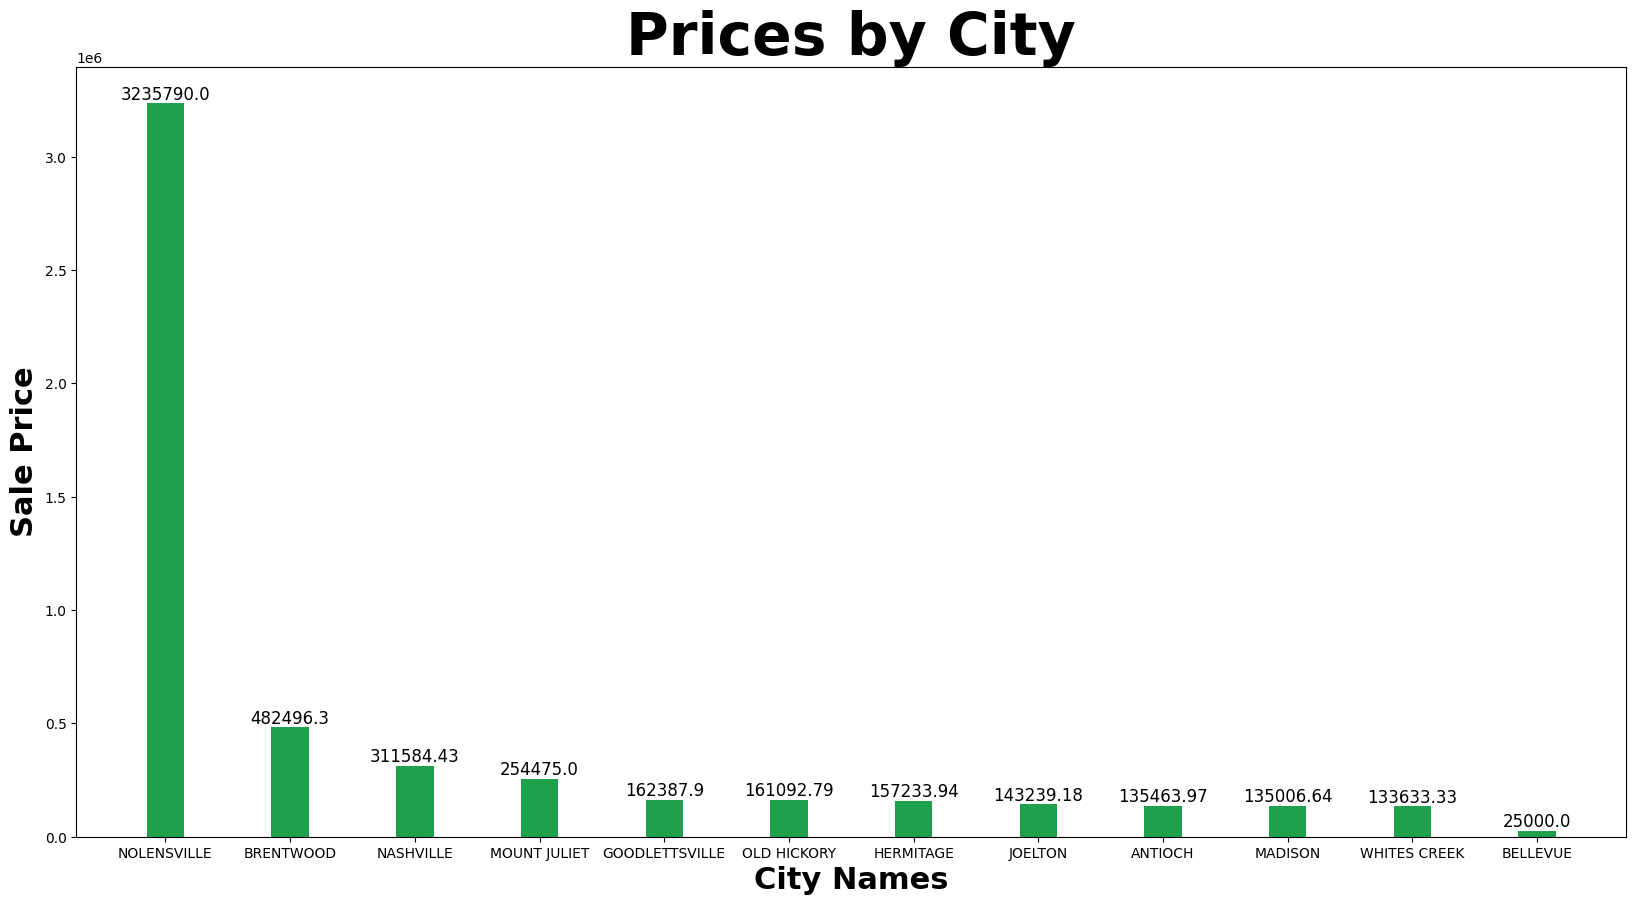

In [ ]:
city_avg_prices = df.groupby('City')['Sale Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
bars = plt.bar(x=city_avg_prices.index, height=city_avg_prices.values, width=0.3, color='#1fa04d')


plt.xlabel("City Names",fontdict={'fontsize': 22,'fontweight':"bold"})
plt.ylabel("Sale Price",fontdict={'fontsize': 22,'fontweight':"bold"})
plt.title("Prices by City",fontdict={'fontsize': 42,'fontweight':"bold"})
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)
plt.show() 

In [ ]:
nash_df = df.loc[df['City'] == 'NASHVILLE',['Parcel ID','City','Sale Price']].sort_values(by='Sale Price', ascending=True).set_index('Parcel ID').head(10)
nash_df

#all nashville city price in ascedning order

NameError: name 'data' is not defined

In [ ]:
df['Month']=df['Sale Date'].str[5:7]
df['Month']=df['Month'].astype('int32')
df.head()
#added a new column month

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,1
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,1
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,1
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,1


In [ ]:
nan_data=data[data.isna().any(axis=1)]
nan_data.head()


,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,1
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,1
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,1
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,1


In [ ]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1,inplace=True)
#dropped useless columns

In [ ]:
data[~data['Sale Price'].apply(lambda x: isinstance(x, (int, float)))]

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month


In [ ]:
df.groupby('Month').sum()
#grouped all the data by month

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
Month,,,,,,,,,,,,,,,,,,,,,
1,105 03 0D 008.00105 11 0 080.00118 03 0 130.00...,RESIDENTIAL CONDOSINGLE FAMILYSINGLE FAMILYSIN...,1208 3RD AVE S1802 STEWART PL2761 ROSEDALE ...,8C-101444031812582148021205506B-3H-13448107403...,NASHVILLENASHVILLENASHVILLENASHVILLENASHVILLEN...,2013-01-242013-01-112013-01-182013-01-182013-0...,2155974594,20130128-000872520130118-000633720130124-00080...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,...,223785700.0,321778300.0,2.492057e+06,PT BSMTSLABFULL BSMTCRAWLCRAWLCRAWLCRAWLCRAWLC...,2555467.0,BRICKBRICK/FRAMEBRICK/FRAMEFRAMEFRAMEFRAMEFRAM...,C C B C C D D C C C C C ...,4061.0,2491.0,387.0
2,093 16 0 089.00105 03 0C 002.00105 03 0D 005.0...,SINGLE FAMILYRESIDENTIAL CONDORESIDENTIAL COND...,71 CLAIBORNE ST1078 B 2ND AVE S1208 3RD AVE...,5B-7M-121611391412088138814220110551130231151W...,NASHVILLENASHVILLENASHVILLENASHVILLENASHVILLEN...,2013-02-052013-02-222013-02-132013-02-122013-0...,685588750,20130208-001334720130225-001881320130215-00157...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,...,207958500.0,297133400.0,2.317491e+06,CRAWLCRAWLFULL BSMTCRAWLFULL BSMTSLABCRAWLFULL...,2409987.0,FRAMEBRICKBRICKFRAMEFRAMEBRICKFRAME/STONEFRAME...,D C C C C D D D C C D C ...,3750.0,2307.0,321.0
3,093 16 0 208.00105 16 0 011.00118 04 0 031.001...,SINGLE FAMILYSINGLE FAMILYSINGLE FAMILYSINGLE ...,69 CANNON ST506 SOUTHERN TURF DR530 ROSEDAL...,N-14R-8130230140491192231001140916125071107501...,NASHVILLENASHVILLENASHVILLENASHVILLENASHVILLEN...,2013-03-252013-03-202013-03-082013-03-072013-0...,1193727322,20130401-003146520130326-002959420130308-00232...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,...,326132700.0,460292600.0,3.649390e+06,CRAWLPT BSMTCRAWLCRAWLCRAWLSLABCRAWLPT BSMTPT ...,3830058.0,FRAMEBRICKFRAMEBRICKFRAMEFRAMEBRICKFRAMEFRAMEF...,D C C C C D D C D D C C ...,6027.0,3683.0,540.0
4,093 16 0 179.00105 03 0 249.00105 03 0D 007.00...,TRIPLEXVACANT RES LANDRESIDENTIAL CONDOSINGLE ...,86 FAIN ST1205 2ND AVE S1208 3RD AVE S628 ...,7120B-1M-16R-713A-1202021312411123456789101112...,NASHVILLENASHVILLENASHVILLENASHVILLENASHVILLEN...,2013-04-152013-04-172013-04-242013-04-302013-0...,1574451847,20130417-003839120130419-003933720130429-00421...,NoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,...,381079100.0,552956220.0,4.171006e+06,SLABCRAWLPT BSMTPT BSMTCRAWLPT BSMTCRAWLPT BSM...,4284959.0,CONC BLKFRAMEBRICKFRAMEBRICK/FRAMEFRAMEFRAMEFR...,D B C C C D D C C C C D ...,6795.0,4158.0,616.0
5,093 16 0 118.00093 16 0 119.00105 07 0 131.001...,DUPLEXVACANT RES LANDSINGLE FAMILYVACANT RES L...,81 MAURY ST64 FAIN ST1315 PILLOW ST1310 PI...,109130E-24M-2104130128141234567891011121314804...,NASHVILLENASHVILLENASHVILLENASHVILLENASHVILLEN...,2013-05-162013-05-162013-05-242013-05-102013-0...,1774931991,20130520-005033320130520-005033320130530-00543...,NoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesN...,YesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,...,441032500.0,646761127.0,4.868570e+06,CRAWLCRAWLCRAWLCRAWLPT BSMTCRAWLSLABCRAWLCRAWL...,4923877.0,FRAMEFRAMEFRAMEFRAMEBRICKFRAMEFRAMEFRAMEBRICKB...,B C D B C C C C C D D D ...,7797.0,4826.0,674.0
6,093 16 0 124.00105 03 0 250.00105 07 0 312.001...,SINGLE FAMILYSINGLE FAMILYSINGLE FAMILYVACANT ...,110 LEWIS ST1207 2ND AVE S621 MOORE AVE619 ...,110146N-13E-7132133034822102132144241501504701...,NASHVILLENASHVILLENASHVILLENASHVILLENASHVILLEN...,2013-06-282013-06-272013-06-142013-06-142013-0...,1987876643,20130702-006818420130701-006737020130621-00639...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo..

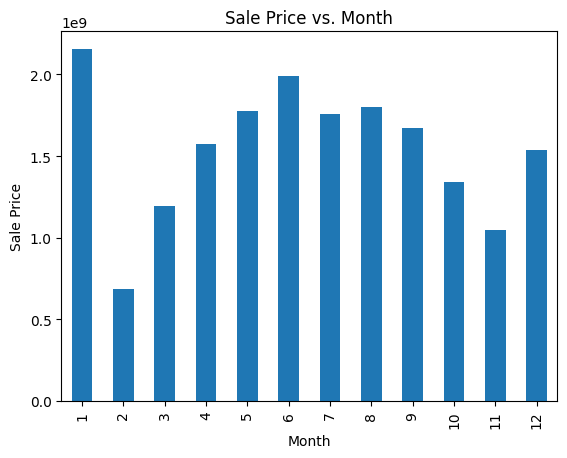

In [ ]:
df.groupby('Month')['Sale Price'].sum().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Sale Price')
plt.title('Sale Price vs. Month')
plt.show()

#0.5 is 500 mill
#hi Arin